In [0]:
import keras 
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D,AveragePooling2D
from keras.regularizers import l2
from keras.optimizers import SGD, RMSprop
from keras.utils import to_categorical
from keras.layers.normalization import BatchNormalization
from keras.utils.vis_utils import plot_model
from keras.layers import Input, GlobalAveragePooling2D
from keras import models
from keras.models import Model
import tensorflow as tf
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.datasets import mnist
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
print(X_train.shape)

(60000, 28, 28)


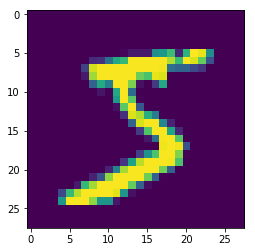

In [0]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0],  28, 28,1)
X_test = X_test.reshape(X_test.shape[0],  28, 28,1)

In [0]:
print(X_train.shape)

(60000, 28, 28, 1)


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
print(y_train.shape)
print(y_train[:10])

(60000,)
[5 0 4 1 9 2 1 3 1 4]


In [0]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
nRows,nCols,nDims = X_train.shape[1:]
input_shape = (nRows, nCols, nDims)
input_img = Input(shape=(28, 28, 1))
print(input_img)


Tensor("input_1:0", shape=(?, 28, 28, 1), dtype=float32)


In [0]:
l1 = Conv2D(64, (3, 3), activation='relu', padding = 'same')(input_img)

layer_1 = Conv2D(2, (1,1), padding='same',  activation='relu')(l1)
layer_1 = Conv2D(4, (5,5), padding='same', activation='relu')(layer_1)
#layer_1 = Conv2D(2, (5,5), padding='same',  activation='relu')(layer_1)

layer_2 = Conv2D(2, (1,1), padding='same', activation='relu')(l1)
layer_2 = Conv2D(4, (3,3), padding='same', activation='relu')(layer_2)

layer_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(l1)
layer_3 = Conv2D(4, (1,1), padding='same', activation='relu')(layer_3)

mid_1 = keras.layers.concatenate([layer_1, layer_2, layer_3], axis = 3)
mid_1 = MaxPooling2D((2,2),strides=(2,2))(mid_1)
#mid_1 = Conv2D(16, (3, 3), activation='relu', padding = 'same')(mid_1)

layer_4 = Conv2D(2, (1,1), padding='same', activation='relu')(mid_1)
layer_4 = Conv2D(4, (7,7), padding='same', activation='relu')(layer_4)

layer_5 = Conv2D(2, (1,1), padding='same', activation='relu')(mid_1)
layer_5 = Conv2D(4, (3,3), padding='same', activation='relu')(layer_5)

layer_6 = Conv2D(2, (1,1), padding='same', activation='relu')(mid_1)
layer_6 = Conv2D(4, (5,5), padding='same', activation='relu')(layer_6)

mid_2 = keras.layers.concatenate([layer_4, layer_5, layer_6], axis = 3)
mid_2 = MaxPooling2D((2,2),strides=(2,2))(mid_2)

#layer_7 = MaxPooling2D((3,3), strides=(1,1), padding='same')(mid_2)
#layer_7 = Conv2D(8, (1,1), padding='same', activation='relu')(layer_7)

layer_7 = Conv2D(4, (1,1), padding='same', activation='relu')(mid_2)
layer_7 = Conv2D(8, (3,3), padding='same', activation='relu')(layer_7)

layer_8 = Conv2D(4, (1,1), padding='same', activation='relu')(mid_2)
layer_8 = Conv2D(8, (5,5), padding='same', activation='relu')(layer_8)

mid_3 = keras.layers.concatenate([layer_7, layer_8], axis = 3)
#mid_3 = MaxPooling2D((2,2),strides=(2,2))(mid_3)
#mid_2 = AveragePooling2D((2,2),strides=(2,2))(mid_1)
mid_3 = Conv2D(1, (1,1), padding='same', activation='relu')(mid_3)


output = Flatten()(mid_3)
out    = Dense(10, activation='softmax')(output)

In [0]:
model = Model(inputs = input_img, outputs = out)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 28, 28, 64)   640         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 28, 28, 2)    130         conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 28, 28, 2)    130         conv2d_2[0][0]                   
____________________________________________________________________________________________

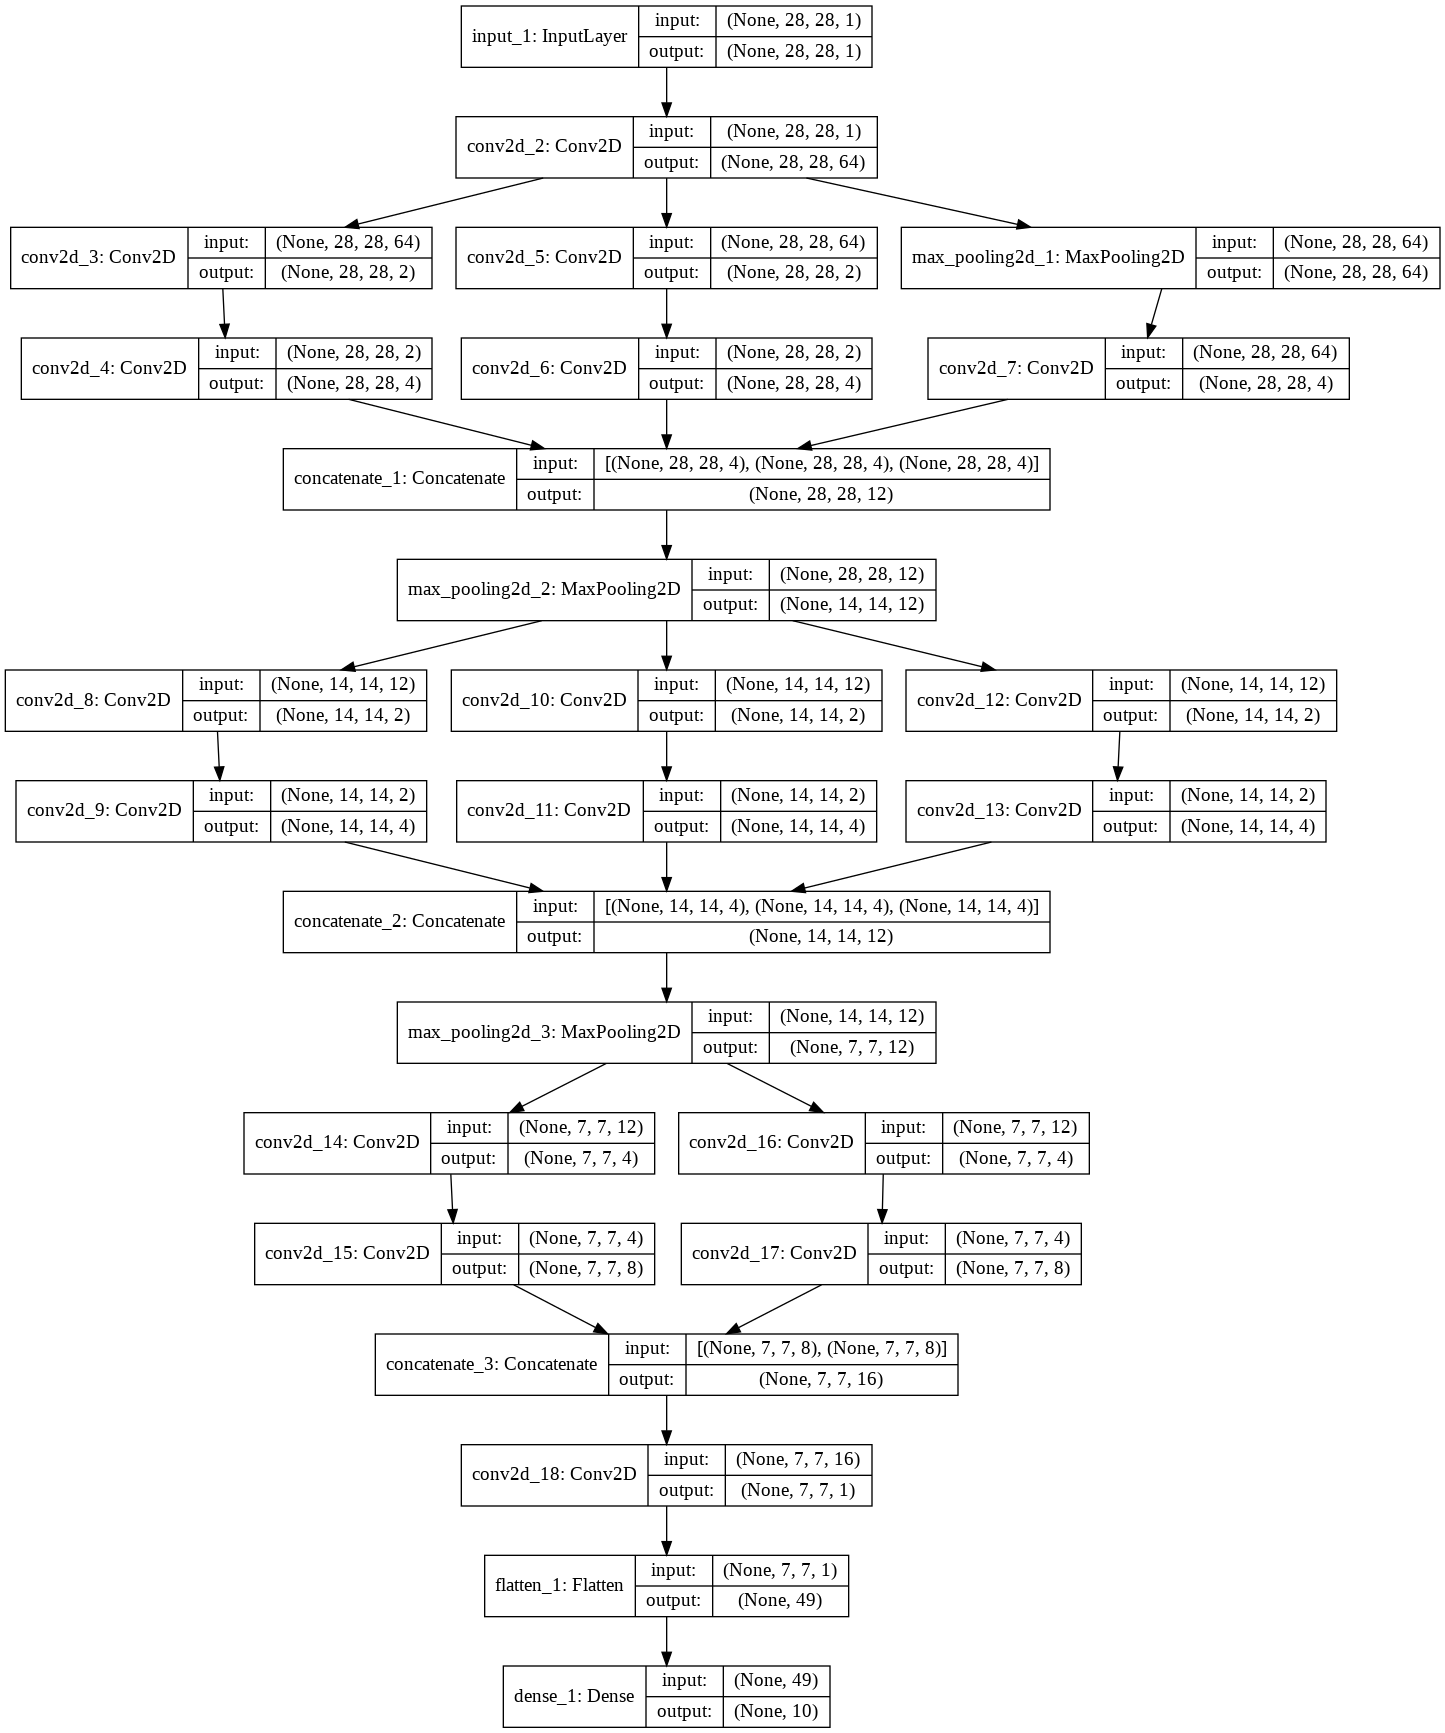

In [0]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot_MNIST_3.9K.png', show_shapes=True, show_layer_names=True)

In [0]:
epochs = 10
#lrate = 0.001
#decay = lrate/epochs
#sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = keras.optimizers.Adam(lr=0.00146, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 43s 714us/step - loss: 0.3940 - acc: 0.8721 - val_loss: 0.1316 - val_acc: 0.9594
Epoch 2/10
60000/60000 [==============================] - 40s 672us/step - loss: 0.1326 - acc: 0.9591 - val_loss: 0.0922 - val_acc: 0.9697
Epoch 3/10
60000/60000 [==============================] - 41s 675us/step - loss: 0.0989 - acc: 0.9695 - val_loss: 0.0898 - val_acc: 0.9724
Epoch 4/10
60000/60000 [==============================] - 40s 671us/step - loss: 0.0838 - acc: 0.9739 - val_loss: 0.0638 - val_acc: 0.9805
Epoch 5/10
60000/60000 [==============================] - 40s 671us/step - loss: 0.0720 - acc: 0.9774 - val_loss: 0.0563 - val_acc: 0.9818
Epoch 6/10
60000/60000 [==============================] - 40s 670us/step - loss: 0.0660 - acc: 0.9796 - val_loss: 0.0579 - val_acc: 0.9817
Epoch 7/10
60000/6000